# Exploratory Data Analysis (EDA) for Olympic Summer & Winter Games, 1896-2022 #

Data from: 
https://www.kaggle.com/datasets/piterfm/olympic-games-medals-19862018?select=olympic_athletes.csv

### Preview Data, Inspect Features and Basic Statistics ###

In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pathlib
import re
from scipy import stats

def list_files_in_directory(directory_path:str) -> list[str]:
    """returns file paths in raw_data/"""
    
    files_list = []
    for entry in os.listdir(directory_path):
        full_path = os.path.join(directory_path,entry)
        if os.path.isfile(full_path):
            files_list.append(full_path)
    return files_list

def create_data_dict(path_li:list[str]) -> dict[str,pd.DataFrame]:
    """ makes a dictionary containing dataframes """
    
    data_dict = {}
    for path in path_li:
        file_name = pathlib.PurePath(path).name.split('.')[0]
        df = pd.read_csv(path)
        data_dict[file_name] = df
    
    return data_dict

# loading all data in raw_data/
DATA_DIR = os.path.join(os.getcwd(),'raw_data')
PATH_LI = list_files_in_directory(DATA_DIR)
DATA_DICT = create_data_dict(PATH_LI)

# splitting data into separate dataframes
medals = DATA_DICT['olympic_medals']
results = DATA_DICT['olympic_results']
athletes = DATA_DICT['olympic_athletes']
hosts = DATA_DICT['olympic_hosts']

# preview of medals earned 
medals.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE


In [2]:
medals.info()
medals.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21697 entries, 0 to 21696
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   discipline_title       21697 non-null  object
 1   slug_game              21697 non-null  object
 2   event_title            21697 non-null  object
 3   event_gender           21697 non-null  object
 4   medal_type             21697 non-null  object
 5   participant_type       21697 non-null  object
 6   participant_title      6584 non-null   object
 7   athlete_url            17027 non-null  object
 8   athlete_full_name      18073 non-null  object
 9   country_name           21697 non-null  object
 10  country_code           20195 non-null  object
 11  country_3_letter_code  21697 non-null  object
dtypes: object(12)
memory usage: 2.0+ MB


,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
count,21697,21697,21697,21697,21697,21697,6584,17027,18073,21697,20195,21697
unique,86,53,1436,4,3,2,493,12116,12895,154,143,154
top,Athletics,tokyo-2020,Individual men,Men,BRONZE,Athlete,United States team,https://olympics.com/en/athletes/michael-phelp...,Michael PHELPS,United States of America,US,USA
freq,3080,1188,215,13932,7529,15113,523,16,16,3094,3094,3094


In [3]:
results.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,NaN,NaN,NaN,NaN
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,NOR,NaN,NaN,NaN,NaN
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,SWE,NaN,NaN,NaN,NaN
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,GBR,NaN,NaN,NaN,NaN
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,CAN,NaN,NaN,NaN,NaN


In [4]:
results.info()
results.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162804 entries, 0 to 162803
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   discipline_title       162804 non-null  object
 1   event_title            162804 non-null  object
 2   slug_game              162804 non-null  object
 3   participant_type       162804 non-null  object
 4   medal_type             20206 non-null   object
 5   athletes               7976 non-null    object
 6   rank_equal             32526 non-null   object
 7   rank_position          158926 non-null  object
 8   country_name           162804 non-null  object
 9   country_code           157768 non-null  object
 10  country_3_letter_code  162804 non-null  object
 11  athlete_url            129991 non-null  object
 12  athlete_full_name      141646 non-null  object
 13  value_unit             78646 non-null   object
 14  value_type             90049 non-null   object
dtype

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
count,162804,162804,162804,162804,20206,7976,32526,158926,162804,157768,162804,129991,141646,78646,90049
unique,86,1567,53,2,3,6845,2,193,238,213,233,68104,75263,46475,12
top,Athletics,individual mixed,rio-2016,Athlete,BRONZE,"[('LETOT LETOT', 'https://olympics.com/en/athl...",True,9,United States of America,US,USA,https://olympics.com/en/athletes/heikki-savola...,Heikki SAVOLAINEN,same time,TIME
freq,19259,2731,7672,141646,7029,37,23613,8279,11916,11916,11916,34,34,99,43774


All features are categorical with no null values. 

### Visualize Key Features and Patterns ###

1.	Are gold medals diversifying over time or are the same top countries increasing their concentration? 

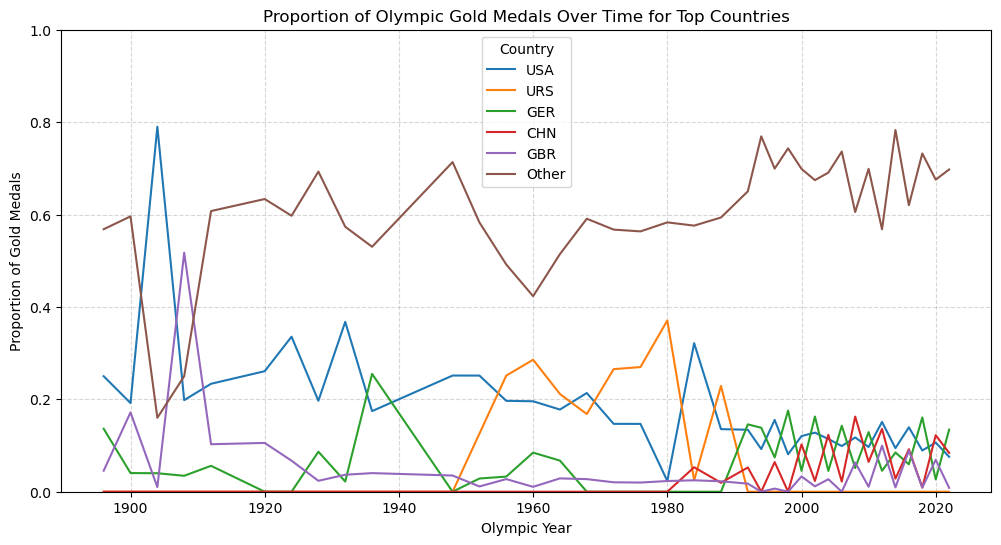

In [5]:
# Extract only Gold Medals
gold = medals[medals["medal_type"] == "GOLD"].copy()
gold["year"] = gold["slug_game"].str.extract(r"(\d{4})").astype(int)

# Calculate gold medals per country per year
gold_counts = gold.groupby(["year", "country_3_letter_code"]).size().reset_index(name="gold_count")

# Top countries to track by gold count
top_countries = gold_counts.groupby("country_3_letter_code")["gold_count"].sum().nlargest(5).index.tolist()

# Prepare proportion data
years = sorted(gold_counts["year"].unique())
proportion_data = []

for year in years:
    year_df = gold_counts[gold_counts["year"] == year]
    total_gold = year_df["gold_count"].sum()
    
    year_dict = {"year": year}
    top_gold_sum = 0
    
    for country in top_countries:
        country_gold = year_df[year_df["country_3_letter_code"] == country]["gold_count"].sum()
        year_dict[country] = country_gold / total_gold if total_gold > 0 else 0
        top_gold_sum += year_dict[country]
    
    # "Other" combines share of all other countries
    year_dict["Other"] = 1 - top_gold_sum
    proportion_data.append(year_dict)

prop_df = pd.DataFrame(proportion_data)
prop_df.set_index("year", inplace=True)

# Plot line chart
plt.figure(figsize=(12,6))
for col in prop_df.columns:
    plt.plot(prop_df.index, prop_df[col], marker='', label=col)

plt.xlabel("Olympic Year")
plt.ylabel("Proportion of Gold Medals")
plt.title("Proportion of Olympic Gold Medals Over Time for Top Countries")
plt.ylim(0, 1)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Country")
plt.show()

2. If an athlete participates in the team competition, would they do better or worse in their individual competitions? (figure skating, gymnastics, swimming, etc.) 

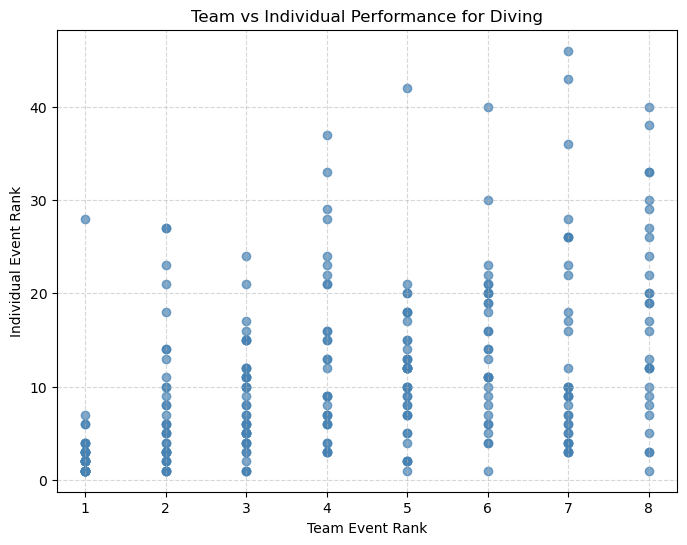

Mean Team Rank: 4.37
Mean Individual Rank: 11.10


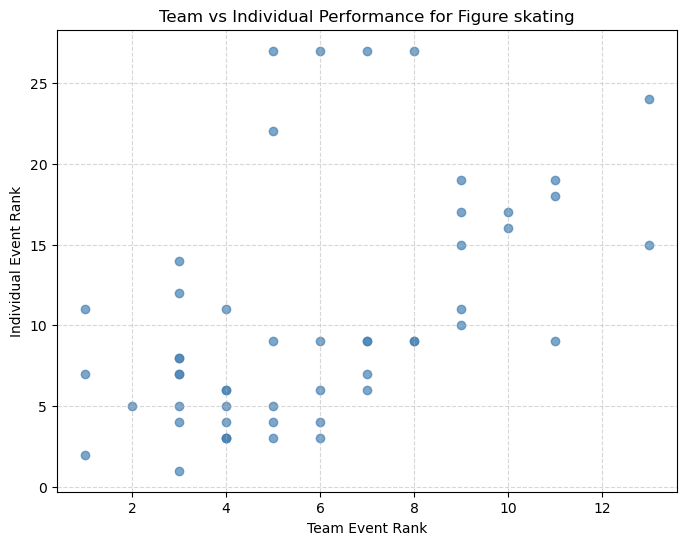

Mean Team Rank: 6.02
Mean Individual Rank: 10.32


In [6]:
def plot_team_vs_individual(df, sport_name):
    # Filter by sport
    sport_df = df[df["discipline_title"] == sport_name].copy()
    
    if sport_df.empty:
        print(f"No data found for '{sport_name}'")
        return
    
    # Convert rank_position to numeric
    sport_df["rank_position"] = pd.to_numeric(sport_df["rank_position"], errors='coerce')
    sport_df["year"] = sport_df["slug_game"].str.extract(r"(\d{4})").astype(int)
    
    
    team_events = sport_df[sport_df["participant_type"] == "GameTeam"].copy()
    # Extract athlete names from each "GameTeam" 
    team_rows = []
    for idx, row in team_events.iterrows():
        if pd.notna(row["athletes"]) and row["athletes"] != "[]":
            athletes_list = ast.literal_eval(row["athletes"])
            for athlete_name, athlete_url in athletes_list:
                team_rows.append({
                    "athlete_full_name": athlete_name,
                    "year": row["year"],
                    "team_event": row["event_title"],
                    "team_rank": row["rank_position"],
                    "team_medal": row["medal_type"]
                })
    
    team_df = pd.DataFrame(team_rows)
    
    if team_df.empty:
        print(f"No team events found for sport '{sport_name}'")
        return
    
    # Individual events for athletes who were in team events
    indiv_df = sport_df[sport_df["participant_type"] == "Athlete"].copy()
    indiv_df = indiv_df[indiv_df["athlete_full_name"].isin(team_df["athlete_full_name"])]
    
    if indiv_df.empty:
        print(f"No individual events found for team athletes in '{sport_name}'")
        return
    
    # Merge team and individual ranks
    merged = pd.merge(
        indiv_df,
        team_df,
        on=["athlete_full_name", "year"],
        how="inner"
    )
    
    if merged.empty:
        print(f"No matching individual-team records for '{sport_name}'")
        return
    
    # Scatter plot
    plt.figure(figsize=(8,6))
    plt.scatter(merged["team_rank"], merged["rank_position"], alpha=0.7, color="steelblue")
    plt.xlabel("Team Event Rank")
    plt.ylabel("Individual Event Rank")
    plt.title(f"Team vs Individual Performance for {sport_name}")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()
    
    # Statistical Review based on Mean Rank
    print(f"Mean Team Rank: {merged['team_rank'].mean():.2f}")
    print(f"Mean Individual Rank: {merged['rank_position'].mean():.2f}")

plot_team_vs_individual(results, "Diving")
plot_team_vs_individual(results, "Figure skating")

3. Do athletes that participate in multiple Olympic games tend to climb the rankings and win medals more than first time Olympians? 


Proportion of medal wins:
 experience
First-time    0.099265
Returning     0.114954
Name: medal, dtype: float64


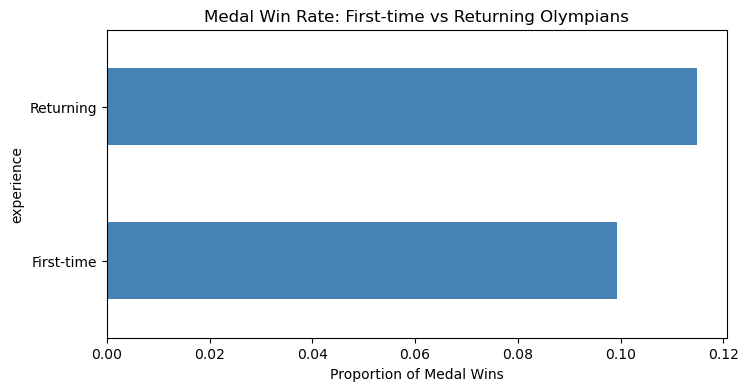

In [7]:
# Keep only individual athletes
indiv_df = results[results["participant_type"] == "Athlete"].copy()

# Convert rank_position to numeric
indiv_df["rank_position"] = pd.to_numeric(indiv_df["rank_position"], errors='coerce')

# Identify Olympic year
indiv_df["year"] = indiv_df["slug_game"].str.extract(r"(\d{4})").astype(int)

# Sort by athlete and year
indiv_df.sort_values(["athlete_full_name", "year"], inplace=True)

# Count previous Olympics
indiv_df["prev_olympics"] = indiv_df.groupby("athlete_full_name")["year"].cumcount()

# Label experience
indiv_df["experience"] = indiv_df["prev_olympics"].apply(lambda x: "First-time" if x == 0 else "Returning")

# Calculate Medal win by binary: 1 if GOLD/SILVER/BRONZE, 0 otherwise
indiv_df["medal"] = indiv_df["medal_type"].notna().astype(int)

# Medal proportion per experience
medal_prop = indiv_df.groupby("experience")["medal"].mean()
print("\nProportion of medal wins:\n", medal_prop)

# Plot proportion of wins
plt.figure(figsize=(8,4))
medal_prop.sort_values().plot(kind="barh", color=["steelblue", "steelblue"])
plt.xlabel("Proportion of Medal Wins")
plt.title("Medal Win Rate: First-time vs Returning Olympians")
plt.show()

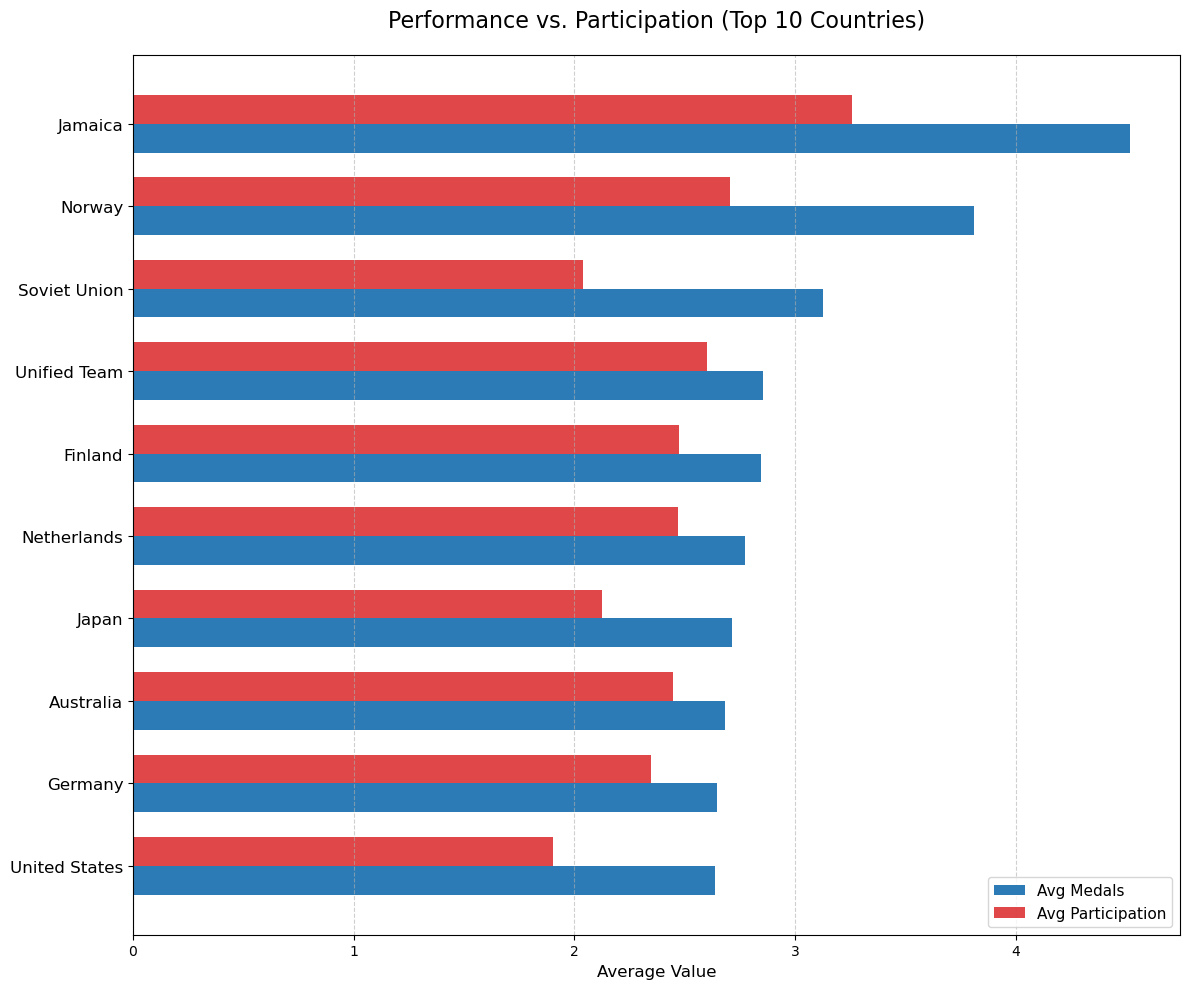

In [8]:
def count_medals(medal_string):
    """counts athlete_medals in athletes"""
    if pd.isna(medal_string) or medal_string == 0:
        return 0
    # Find all sequences of digits in the string
    numbers = re.findall(r'\d+', str(medal_string))
    # Convert found strings to integers and sum them
    return sum(map(int, numbers))

name_map = {
    'Russian Federation': 'Russia',
    'Republic of Korea': 'South Korea',
    'United States of America': 'United States',
    'German Democratic Republic (Germany)':'Germany'
}

athletes['total_medals_count'] = (athletes['athlete_medals']
                                  .apply(count_medals))

#joining medals and athletes by athlete_full_name
medal_metric_cols = ['country_name',
                   'athlete_full_name',
                   'total_medals_count',
                   'games_participations']
medals_athletes = pd.merge(medals,
                           athletes,
                           on='athlete_full_name')
medals_athletes['country_name'] = medals_athletes['country_name'].replace(name_map)
medal_metrics = medals_athletes[medal_metric_cols]

country_mean_metrics = (medal_metrics
                        .groupby('country_name')
                        .agg({'total_medals_count': 'mean',
                            'games_participations': 'mean',
                            'athlete_full_name': 'count'
                             }
                            )
                       )
# Rename columns
country_mean_metrics.columns = ['Avg Medals per Athlete',
                                'Avg Games Participation',
                                'Number of Athletes']

# Sort by Avg Medals to see the top performers
country_mean_metrics = (country_mean_metrics
                        .sort_values(by='Avg Medals per Athlete',
                                     ascending=False
                                    )
                       )


# Filter for countries with at least 50 athletes for a fairer comparison
more_than_50 = country_mean_metrics['Number of Athletes'] >= 50
filtered_metrics = country_mean_metrics[more_than_50]

# 1. Reverse top_10 so the #1 country is at the top of the chart
top_10_plot = filtered_metrics.head(10).iloc[::-1] 

# 2. Set up the figure
fig, ax = plt.subplots(figsize=(12, 10))

# 3. Define bar height and positions
height = 0.35 
y_indices = range(len(top_10_plot))

# 4. Plot horizontal bars
bar1 = ax.barh([y - height/2 for y in y_indices], 
               top_10_plot['Avg Medals per Athlete'], 
               height, label='Avg Medals', color='#2c7bb6')

bar2 = ax.barh([y + height/2 for y in y_indices], 
               top_10_plot['Avg Games Participation'], 
               height, label='Avg Participation', color='#d7191c', alpha=0.8)

# 5. Formatting for readability
ax.set_yticks(y_indices)
ax.set_yticklabels(top_10_plot.index, fontsize=12) # Larger font for countries
ax.set_xlabel('Average Value', fontsize=12)
ax.set_title('Performance vs. Participation (Top 10 Countries)', fontsize=16, pad=20)

# 6. Add the legend
ax.legend(loc='lower right', fontsize=11)

# 7. Add gridlines for the x-axis to help track the bar lengths
ax.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

The plot above shows the average medals versus the average number of participants of a given country across the entire dataset.
- Top 10 countries are chosen by finding highest medal averages across all games

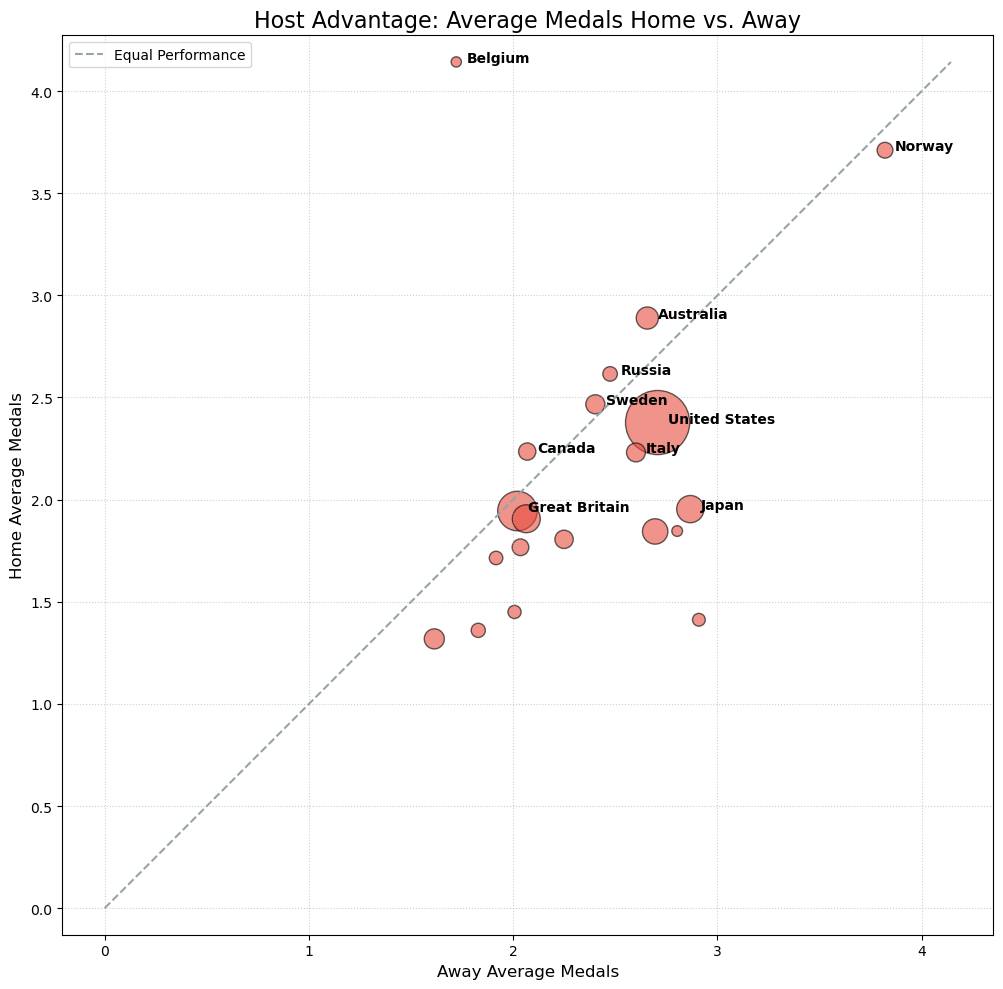

In [9]:
performance_with_hosts = pd.merge(
    medals_athletes, 
    hosts[['game_slug', 'game_location']], 
    left_on='slug_game', 
    right_on='game_slug'
)
performance_with_hosts['game_location'] = performance_with_hosts['game_location'].replace(name_map)
# Make the Home Team column
home_condition = (performance_with_hosts['country_name'] 
                  == performance_with_hosts['game_location']
                 )
performance_with_hosts['is_host'] = home_condition
home_advantage = (performance_with_hosts
                  .groupby(['country_name','is_host'])
                  .agg(
                      avg_medals=('total_medals_count','mean'),
                      athlete_count=('athlete_full_name','nunique'))
                  .unstack()
                 )
home_advantage.columns = ['Away_Medal_Avg',
                          'Home_Medal_Avg',
                          'Away_Medal_Count',
                          'Home_Medal_Count']
# filtering to home contries with at least 10 medals
minimum_10_condition = home_advantage['Home_Medal_Count'] >= 10
top_home_performers = (home_advantage[minimum_10_condition]
                       .sort_values('Home_Medal_Avg',
                                    ascending=False)
                      )
# 1. Setup the figure
plt.figure(figsize=(10, 10))

# 2. Create the scatter plot
# We use all 'top_home_performers' instead of just head(10) to see the full context
plt.scatter(
    top_home_performers['Away_Medal_Avg'], 
    top_home_performers['Home_Medal_Avg'], 
    s=top_home_performers['Home_Medal_Count'] * 5, # Size bubbles by medal count
    alpha=0.6, 
    color='#e74c3c',
    edgecolors='black'
)

# 3. Add a "Break-Even" Line (Diagonal)
# If a country is on this line, they performed exactly the same home and away
max_val = max(top_home_performers['Home_Medal_Avg'].max(), top_home_performers['Away_Medal_Avg'].max())
plt.plot([0, max_val], [0, max_val], color='#95a5a6', linestyle='--', label='Equal Performance')

# 4. Label the top 10 countries
for i in range(10):
    country = top_home_performers.index[i]
    plt.text(
        top_home_performers['Away_Medal_Avg'].iloc[i] + 0.05, 
        top_home_performers['Home_Medal_Avg'].iloc[i], 
        country, 
        fontsize=10,
        fontweight='bold'
    )

# 5. Formatting
plt.title('Host Advantage: Average Medals Home vs. Away', fontsize=16)
plt.xlabel('Away Average Medals', fontsize=12)
plt.ylabel('Home Average Medals', fontsize=12)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)

# Keep the axes square for a better visual comparison of the diagonal
plt.axis('equal') 

plt.tight_layout()
plt.show()

The above plot shows the relationship between the average medals a country obtains when they are hosting a game vs away. 
- Size of the dot is the number of medals a country obtained when they were hosting.
- Diagonal line is for reference using the max and minimum means. In the future it could be a linear regression.

In [10]:
# only keeping data with a home and away average
full_host_data = home_advantage.dropna(subset=['Away_Medal_Avg',
                                               'Home_Medal_Avg'])
# fitting regression
slope, intercept, r_value, p_value, std_err = stats.linregress(
    full_host_data['Away_Medal_Avg'], 
    full_host_data['Home_Medal_Avg']
)
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")

R-squared: 0.1696
P-value: 0.0509
